# Forecast the sales for 1 year for the furniture product category on the basis of the historical data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"SampleSuperstore.xls",header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
furniture=df[df['Category']=='Furniture']
furniture.shape

(2121, 21)

In [6]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
# furniture['Order Date']=pd.to_datetime(furniture['Order Date']) # to convert object to datetime

In [8]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape

(2121, 2)

In [10]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [12]:
furniture=furniture.sort_values('Order Date',ascending=True) # sorting in ascending order
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [14]:
furniture['Order Date'].value_counts().head(10)

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
2017-10-02     8
2016-09-18     8
2015-11-20     8
2017-09-15     8
2017-12-01     8
Name: Order Date, dtype: int64

In [15]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [16]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [17]:
furniture=furniture.set_index("Order Date") # makikng order date as index 

In [18]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [19]:
y=furniture['Sales'].resample("W").mean() # on weakely bases

In [20]:
print(y.shape)
y

(208,)


Order Date
2014-01-12     678.107000
2014-01-19     312.618250
2014-01-26     551.986000
2014-02-02     311.833000
2014-02-09      14.560000
                 ...     
2017-12-03    2286.881714
2017-12-10    1465.734000
2017-12-17     773.303167
2017-12-24    1212.340500
2017-12-31    1009.391200
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

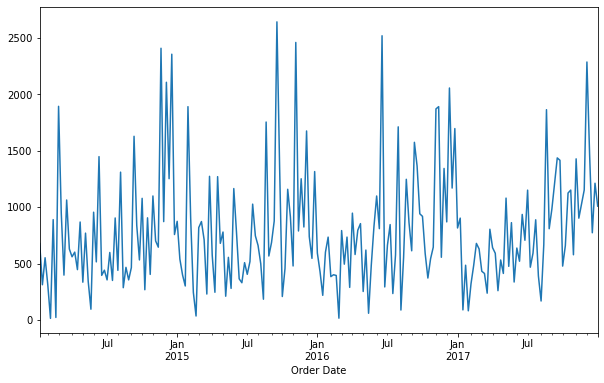

In [21]:
y.plot(figsize=(10,6))
plt.show()

In [22]:
y=furniture['Sales'].resample("M").mean() # on montholy bases

In [23]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

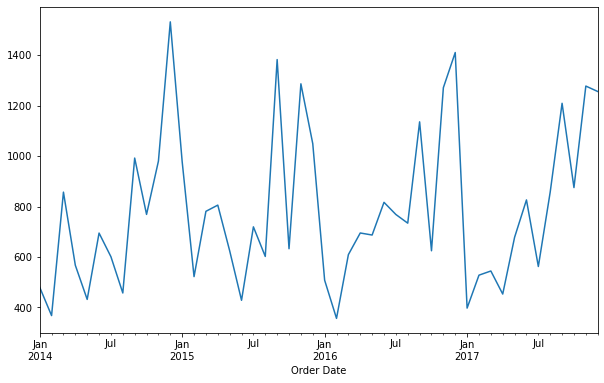

In [24]:
y.plot(figsize=(10,6))
plt.show()

In [25]:
train=y.loc[:'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [26]:
test=y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

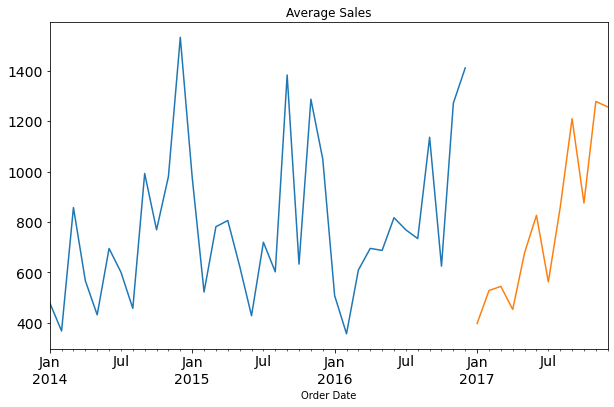

In [27]:
# plotting the data
train.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
test.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
plt.show()

# SimpleExpSmoothing 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


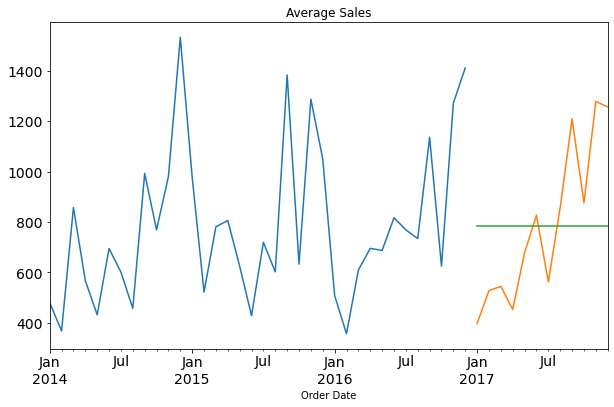

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [29]:
Exp_Smooth.SES # predicted values

2017-01-31    784.196954
2017-02-28    784.196954
2017-03-31    784.196954
2017-04-30    784.196954
2017-05-31    784.196954
2017-06-30    784.196954
2017-07-31    784.196954
2017-08-31    784.196954
2017-09-30    784.196954
2017-10-31    784.196954
2017-11-30    784.196954
2017-12-31    784.196954
Freq: M, dtype: float64

In [30]:
fit1.aic # get aic value

415.87664216026513

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

303.4766834364632


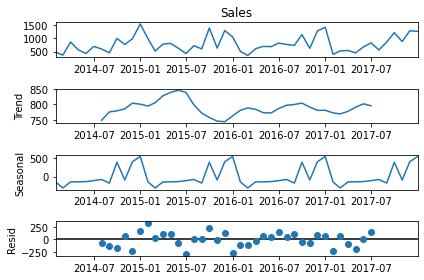

In [32]:
import statsmodels.api as sm 
decomposition=sm.tsa.seasonal_decompose(y)  # by looking on the trend and seasoniality decide which method is to apply
fig=decomposition.plot()
plt.show()

- no trend+ had seasonality holt-winter method is used

# using Holt method 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\AppData\Local\Temp/ipykernel_13920/903746277.py:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope=0.25)
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


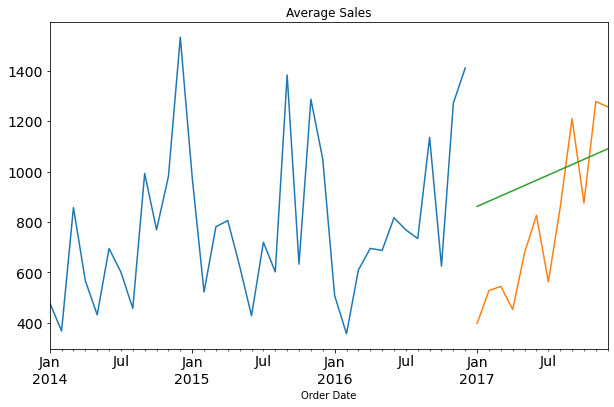

In [33]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level=alpha
#smoothing slope=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope=0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [34]:
fit1.aic

424.07649756811844

In [35]:
sm.__version__

'0.12.2'

In [36]:
Holt_df['Holt_linear']

2017-01-31     861.702674
2017-02-28     882.448462
2017-03-31     903.194250
2017-04-30     923.940037
2017-05-31     944.685825
2017-06-30     965.431613
2017-07-31     986.177400
2017-08-31    1006.923188
2017-09-30    1027.668976
2017-10-31    1048.414763
2017-11-30    1069.160551
2017-12-31    1089.906339
Freq: M, dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_df.Holt_linear))
print(rmse)

305.115076094729


# best alpha and beta value 

"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        print(fit1.aic,i,j)
"""

# ExponentialSmoothing 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


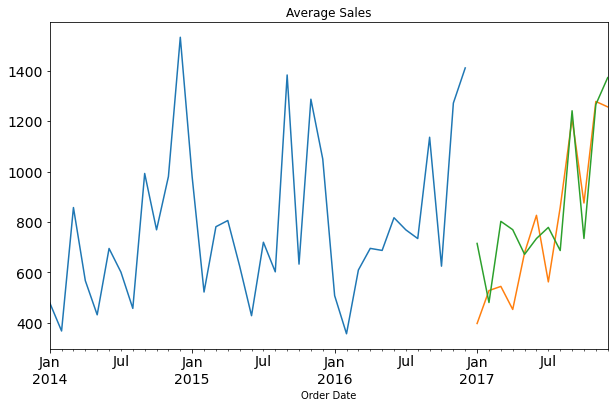

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#smoothing level=alpha
#smoothing slope=beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = ExponentialSmoothing(train,seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [39]:
fit1.aic

398.6779049415133

In [40]:
Holt_Winter_df['Holt_Winter']

2017-01-31     715.008277
2017-02-28     480.782771
2017-03-31     802.521285
2017-04-30     769.527351
2017-05-31     671.789687
2017-06-30     734.481148
2017-07-31     778.574982
2017-08-31     686.892917
2017-09-30    1240.943745
2017-10-31     734.723835
2017-11-30    1265.598966
2017-12-31    1372.376329
Freq: M, dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_Winter_df.Holt_Winter))
print(rmse)

179.8815773614504


# ExponentialSmoothing for all data 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


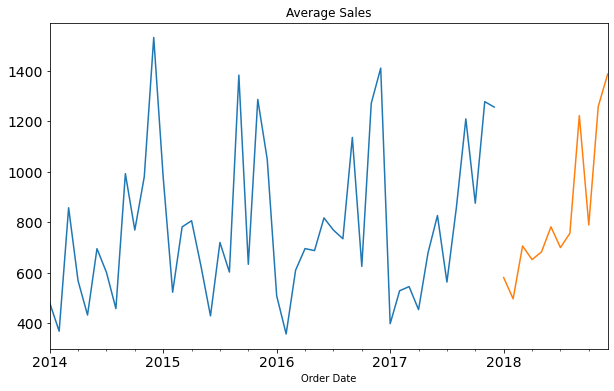

In [42]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
#Y_predictions= fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_prediction.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [43]:
fit1.aic

525.7957945203857

In [44]:
Y_prediction

2018-01-31     580.451006
2018-02-28     496.355784
2018-03-31     705.733059
2018-04-30     651.846606
2018-05-31     682.086694
2018-06-30     781.660321
2018-07-31     699.324871
2018-08-31     755.973744
2018-09-30    1222.535500
2018-10-31     789.104164
2018-11-30    1258.704726
2018-12-31    1387.383280
Freq: M, dtype: float64

# ExponentialSmoothing using predict data 

C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\khatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


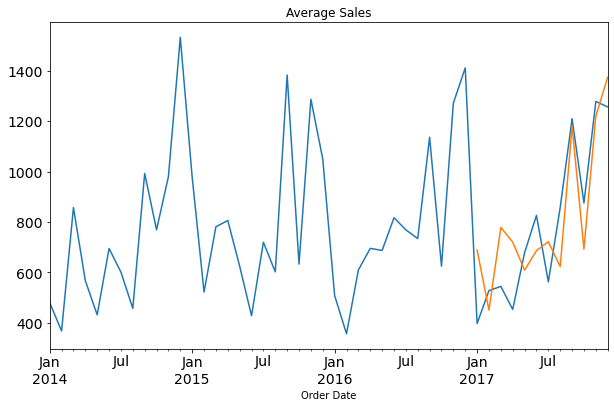

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasinalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,trend='add',seasonal='add').fit()
Y_prediction= fit1.predict(start=pd.to_datetime('2017-01-31')) # using predict
#Y_prediction = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_prediction.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [46]:
Y_prediction

Order Date
2017-01-31     688.603242
2017-02-28     450.679234
2017-03-31     778.769799
2017-04-30     720.386096
2017-05-31     608.789612
2017-06-30     686.405706
2017-07-31     721.719667
2017-08-31     623.254370
2017-09-30    1179.903320
2017-10-31     692.411626
2017-11-30    1220.246998
2017-12-31    1374.122067
Freq: M, dtype: float64

In [48]:
Y_prediction.to_excel(r'TimeSeriesOutput.xlsx',index=True)

# ARIMA 

In [49]:
import pmdarima as pm # to find the best p d q values

In [50]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [51]:
#p+q+P+Q<=10 for max_order=10
#p+q<=3

In [52]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.06 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.06 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.04 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.07 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.04 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.08 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.29 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=0.62 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.18 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [53]:
model.aic()

489.4176261246747

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

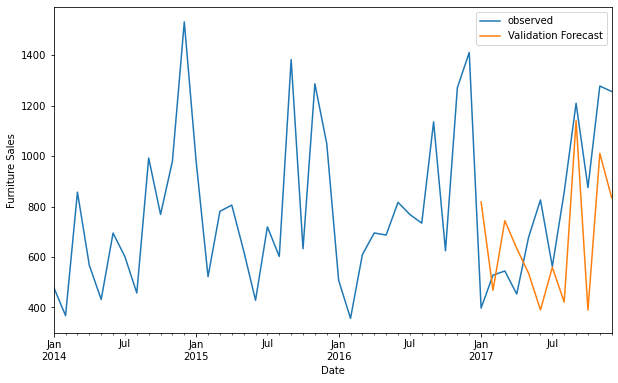

In [55]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [56]:
pred.predicted_mean

2017-01-31     818.524071
2017-02-28     468.470309
2017-03-31     744.079645
2017-04-30     634.497995
2017-05-31     535.745823
2017-06-30     390.163831
2017-07-31     559.376330
2017-08-31     421.341663
2017-09-30    1140.775386
2017-10-31     389.701161
2017-11-30    1011.052590
2017-12-31     834.732448
Freq: M, Name: predicted_mean, dtype: float64

In [57]:
Y_pred=pred.predicted_mean
Y_test=y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

308.7696920453649


In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

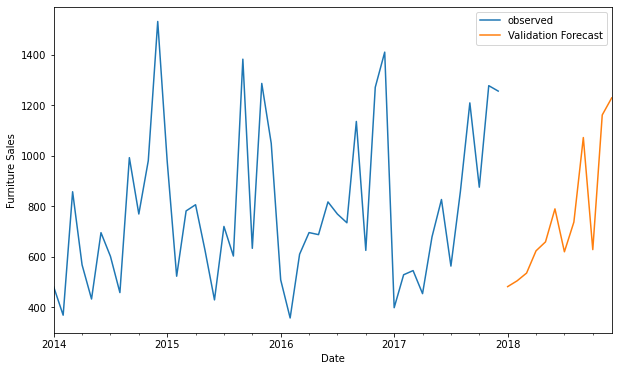

In [59]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [60]:
pred.predicted_mean.to_excel(r'TimeSeriesBYARIMA.xlsx',index=True)